# EDA (Exploratory Data Analysis)

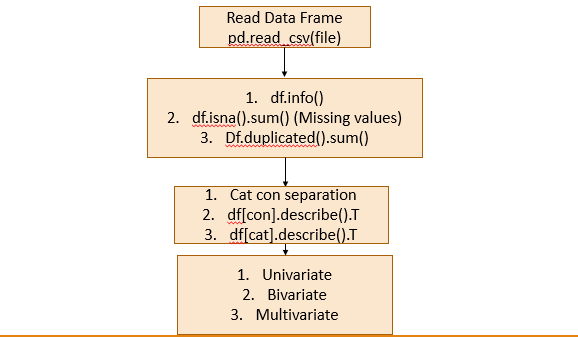

In [6]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [8]:
path1 = r"C:\ETLHive lectures by me\Datasets\laptopPrice.csv"
print(path1)

C:\ETLHive lectures by me\Datasets\laptopPrice.csv


In [10]:
import pandas as pd
df = pd.read_csv(path1)
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


# Step 2 - Perform Basic data quality checks

In [13]:
df.shape

(823, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [19]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [21]:
df.duplicated().sum()

21

In [23]:
# Drop duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [25]:
df.shape

(802, 19)

In [27]:
df.duplicated().sum()

0

# Step 3 - Descriptive Statistics

In [30]:
cat = list(df.columns[df.dtypes == "object"])
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [32]:
con = list(df.columns[df.dtypes != "object"])
con

['Price', 'Number of Ratings', 'Number of Reviews']

In [36]:
df[cat].describe().T

,count,unique,top,freq
brand,802,8,ASUS,243
processor_brand,802,3,Intel,594
processor_name,802,11,Core i5,284
processor_gnrtn,802,8,11th,328
ram_gb,802,4,8 GB,404
ram_type,802,6,DDR4,690
ssd,802,7,512 GB,389
hdd,802,4,0 GB,602
os,802,3,Windows,763
os_bit,802,2,64-bit,693


In [38]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


# Step 4 - Data Visulization
1. Univariate
2. Bivariate
3. Multivariate

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate
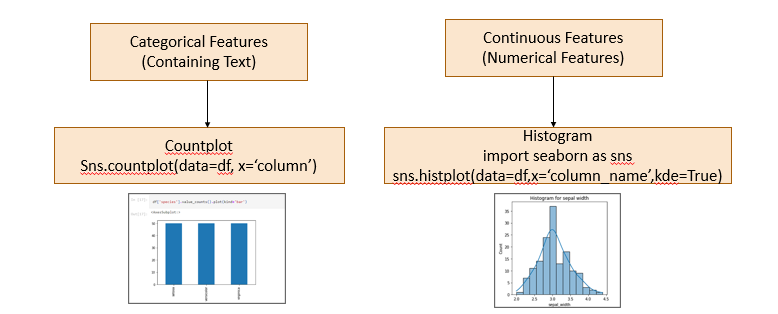

In [49]:
df["brand"].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

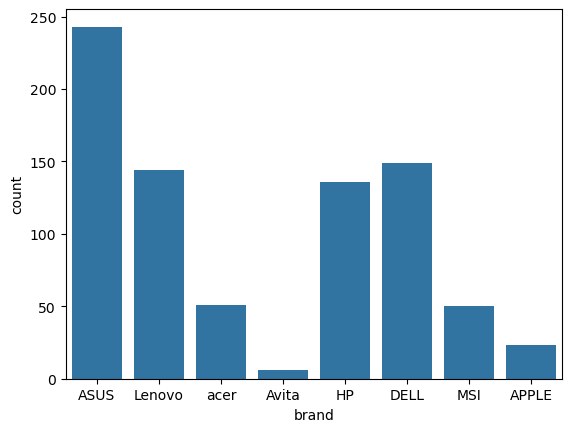

In [51]:
sns.countplot(data=df, x="brand")

<Axes: xlabel='brand', ylabel='count'>

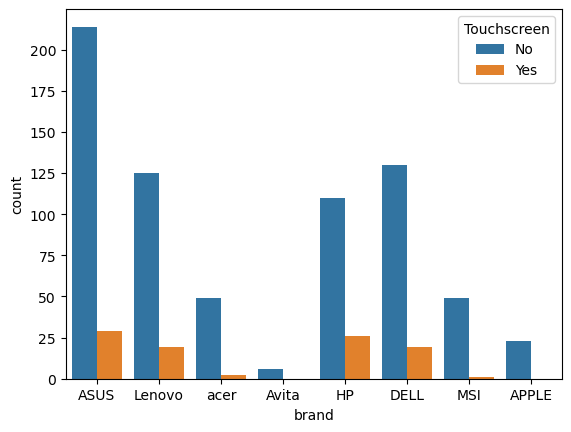

In [53]:
sns.countplot(data=df, x="brand", hue="Touchscreen")

<Axes: xlabel='brand', ylabel='count'>

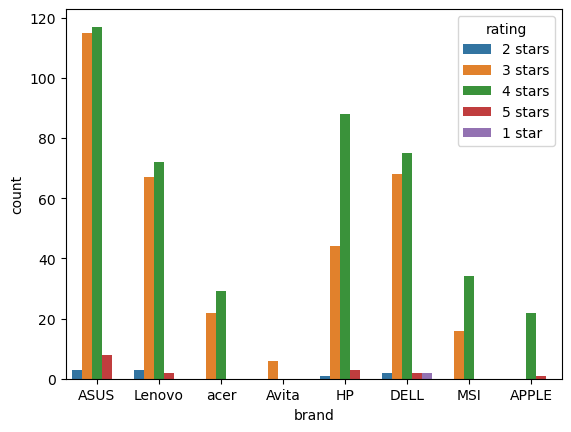

In [55]:
sns.countplot(data=df, x="brand", hue="rating")

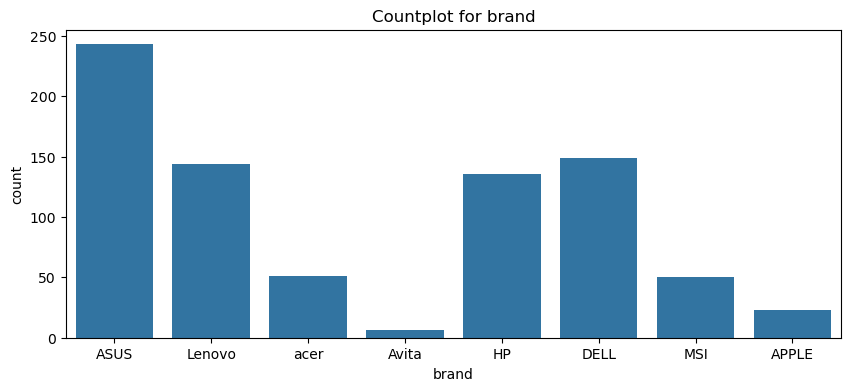

In [65]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="brand")
plt.title("Countplot for brand")
plt.show()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64


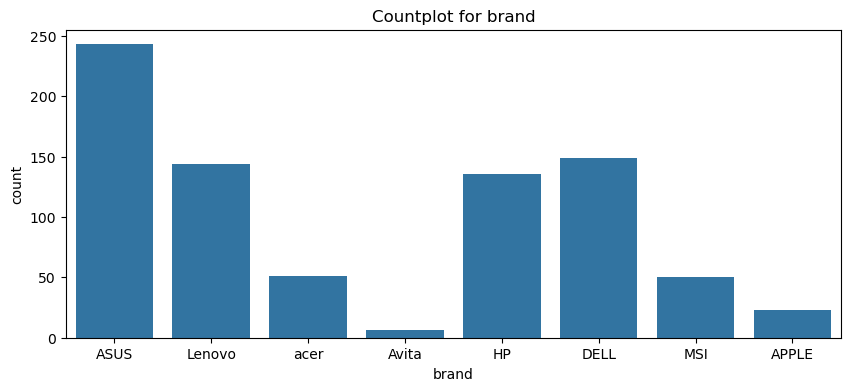



processor_brand
Intel    594
AMD      189
M1        19
Name: count, dtype: int64


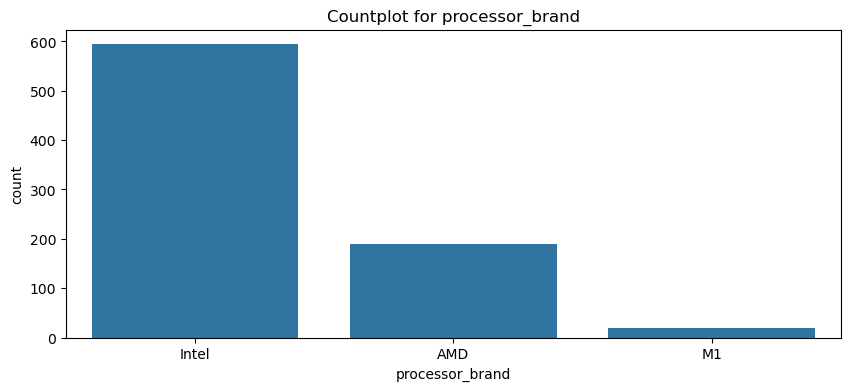



processor_name
Core i5         284
Core i3         161
Core i7         104
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     23
M1               19
Pentium Quad     13
Core i9           8
Name: count, dtype: int64


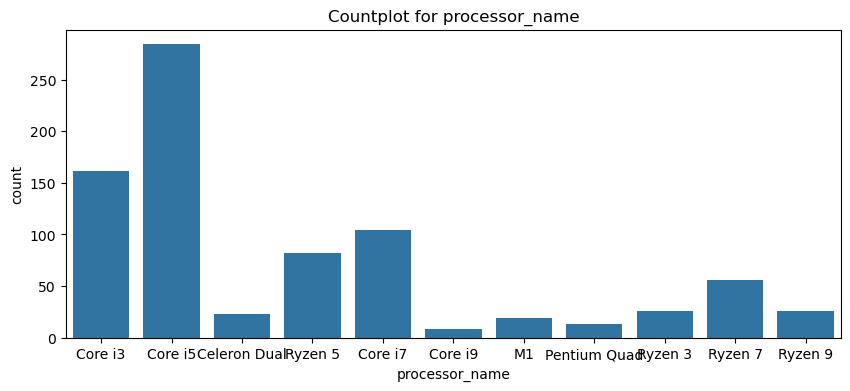



processor_gnrtn
11th             328
Not Available    224
10th             198
8th               35
7th                7
9th                6
12th               3
4th                1
Name: count, dtype: int64


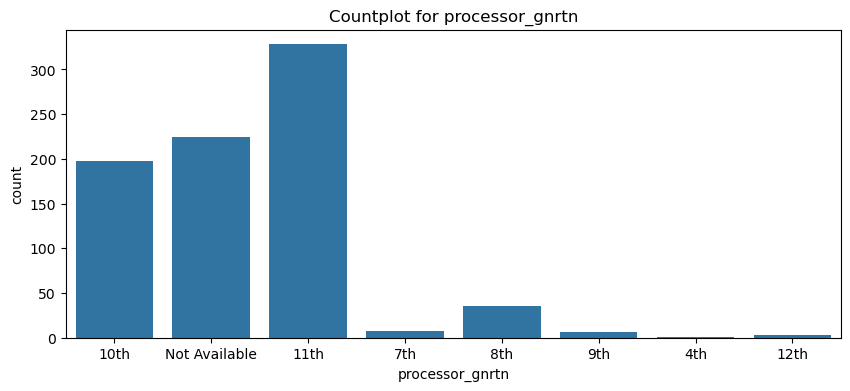



ram_gb
8 GB     404
4 GB     223
16 GB    173
32 GB      2
Name: count, dtype: int64


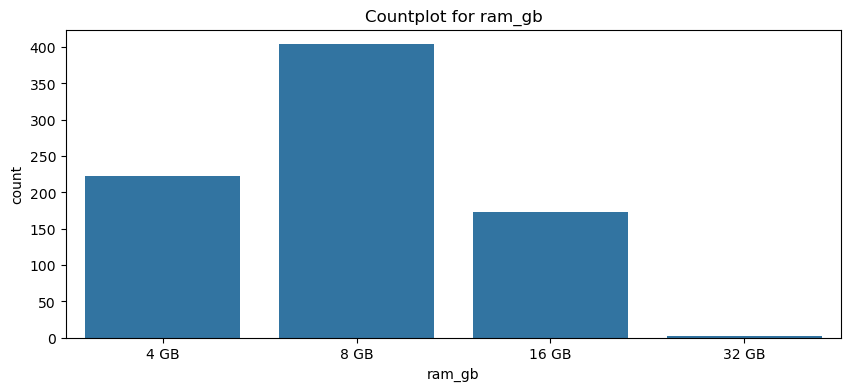



ram_type
DDR4       690
LPDDR4X     56
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64


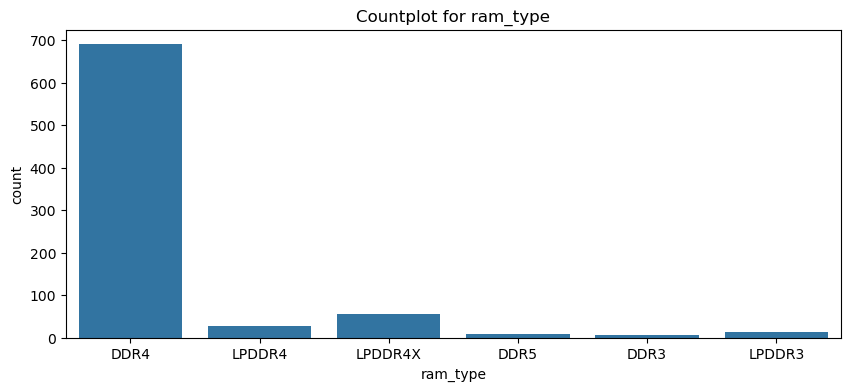



ssd
512 GB     389
256 GB     174
0 GB       123
1024 GB    110
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64


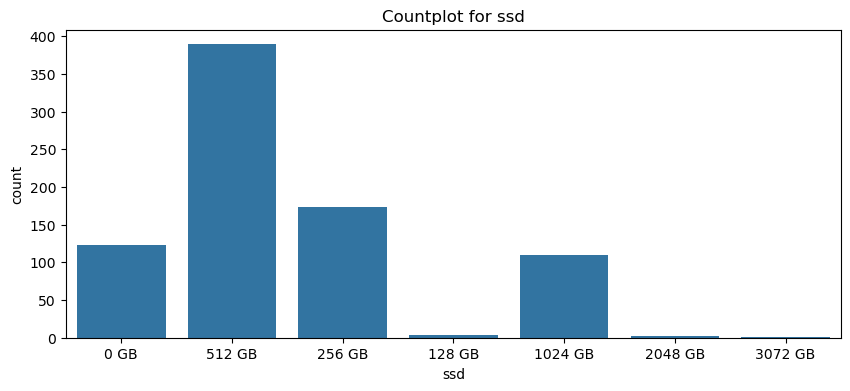



hdd
0 GB       602
1024 GB    159
512 GB      40
2048 GB      1
Name: count, dtype: int64


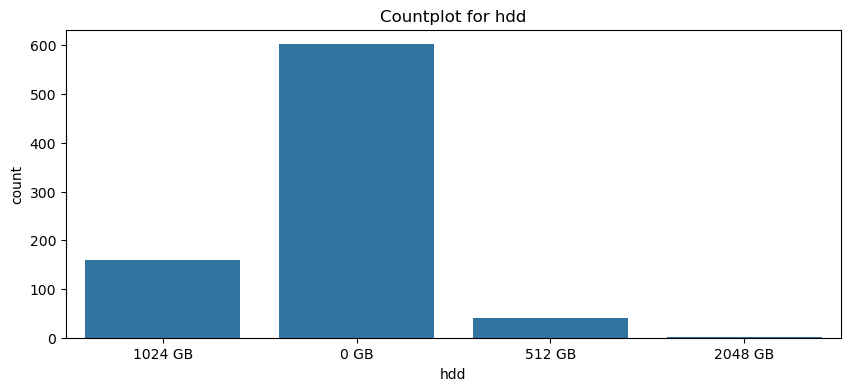



os
Windows    763
Mac         23
DOS         16
Name: count, dtype: int64


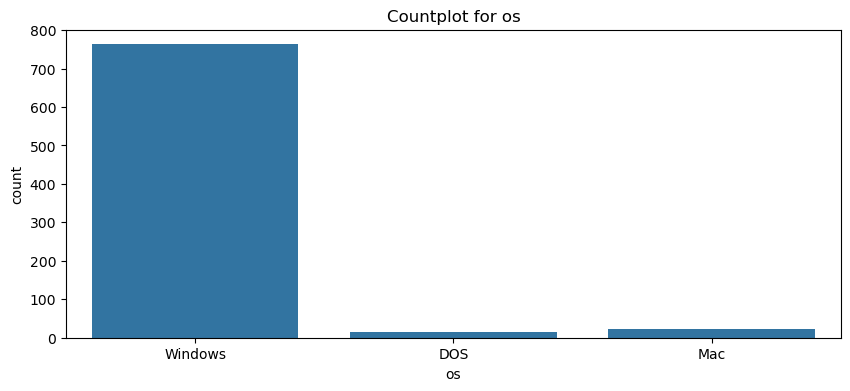



os_bit
64-bit    693
32-bit    109
Name: count, dtype: int64


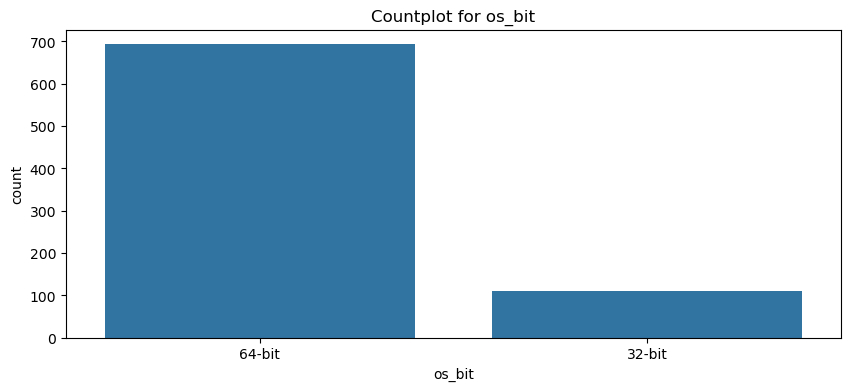



graphic_card_gb
0 GB    557
4 GB    127
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64


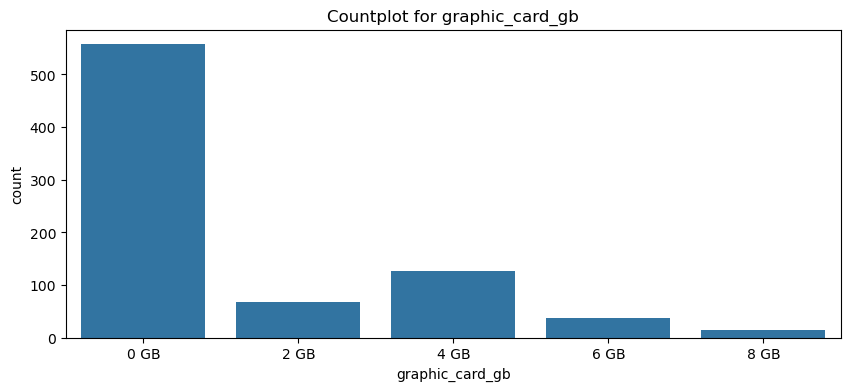



weight
Casual        509
ThinNlight    254
Gaming         39
Name: count, dtype: int64


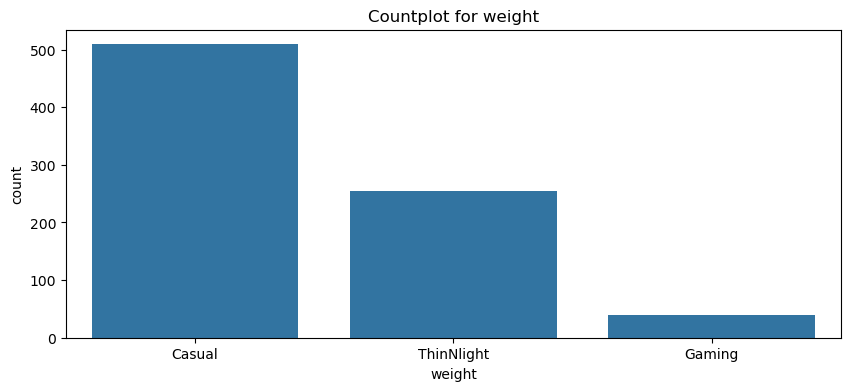



warranty
1 year         498
No warranty    268
2 years         23
3 years         13
Name: count, dtype: int64


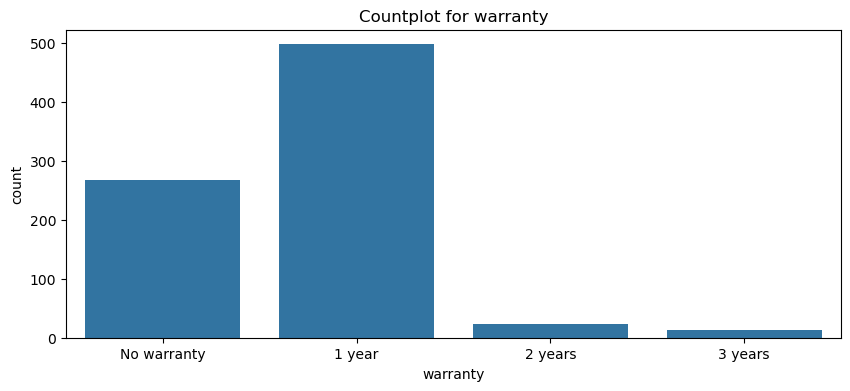



Touchscreen
No     706
Yes     96
Name: count, dtype: int64


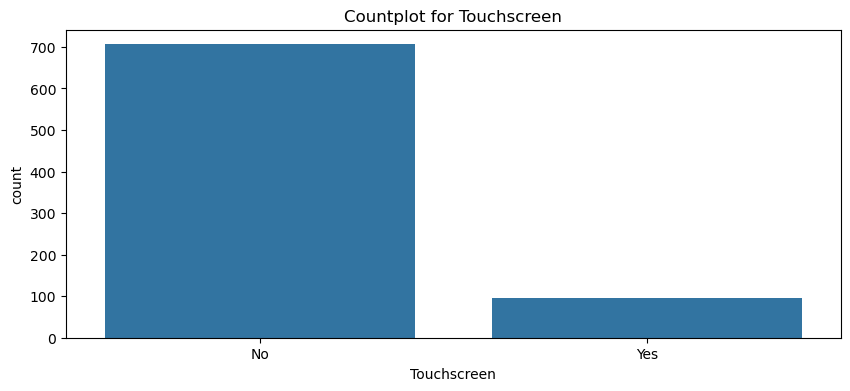



msoffice
No     522
Yes    280
Name: count, dtype: int64


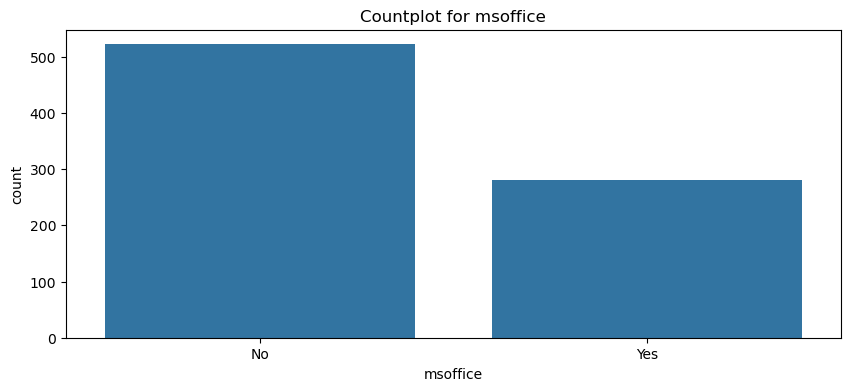



rating
4 stars    437
3 stars    338
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64


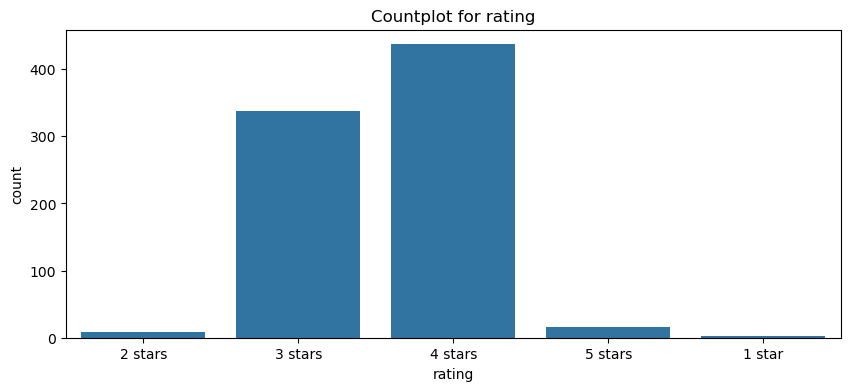

In [71]:
for i in cat:
    print(df[i].value_counts())
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=i)
    plt.title(f"Countplot for {i}")
    plt.show()
    print("\n" + "="*100 + "\n")

### Histogram for continous features

In [74]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

<Axes: xlabel='Price', ylabel='Count'>

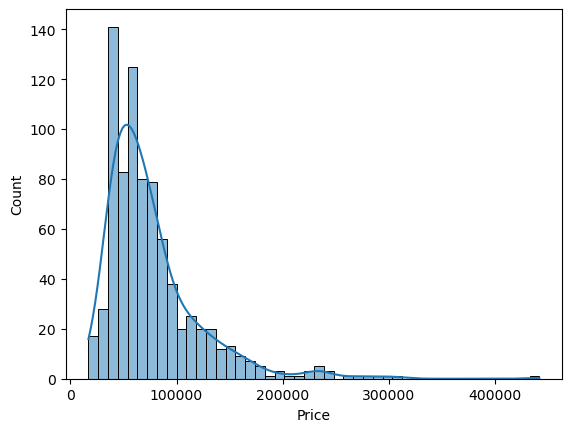

In [78]:
sns.histplot(data=df, x="Price", kde=True)

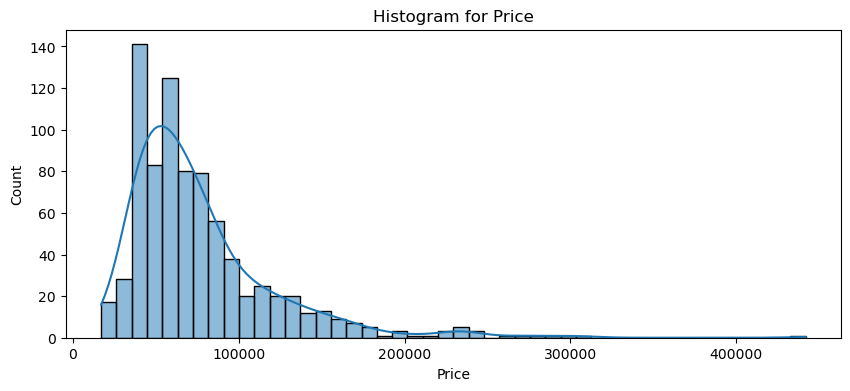

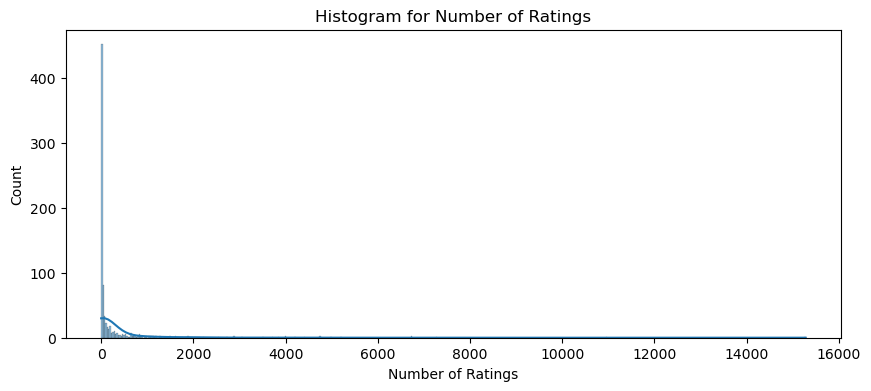

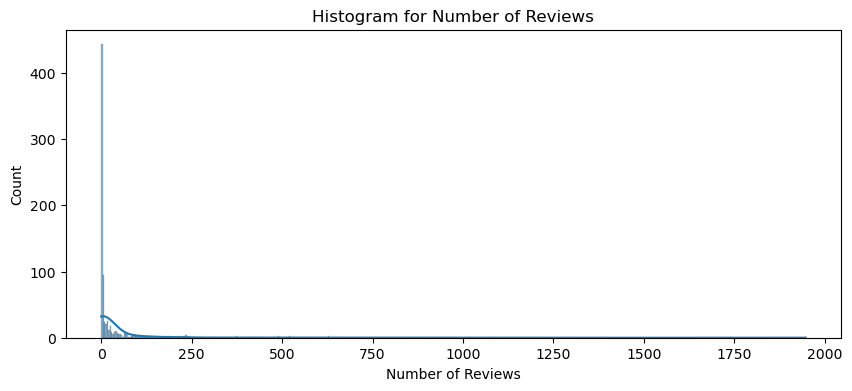

In [82]:
for i in con:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f"Histogram for {i}")
    plt.show()

## Bivariate

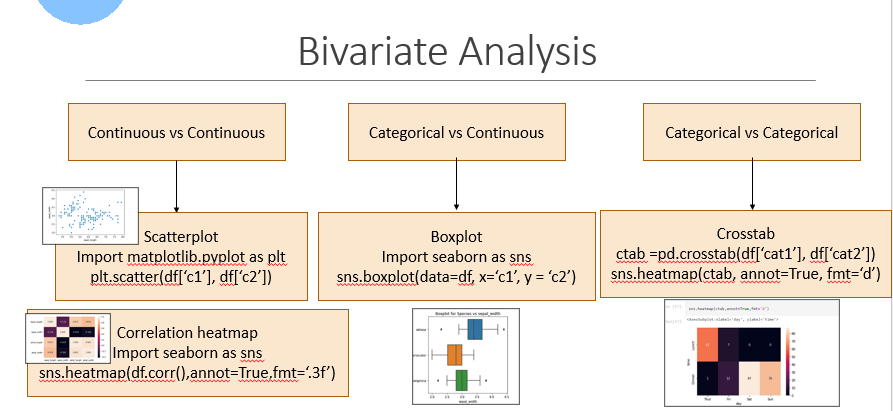

### Continuous vs continuous -> Scatterplot

In [88]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

<Axes: xlabel='Number of Ratings', ylabel='Price'>

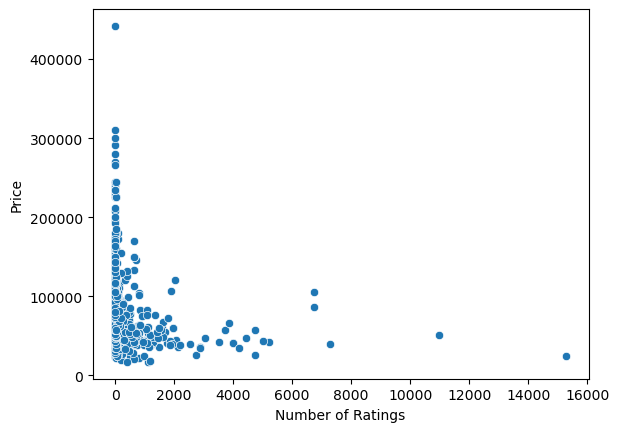

In [90]:
sns.scatterplot(data=df, x="Number of Ratings", y="Price")

<Axes: xlabel='Number of Reviews', ylabel='Price'>

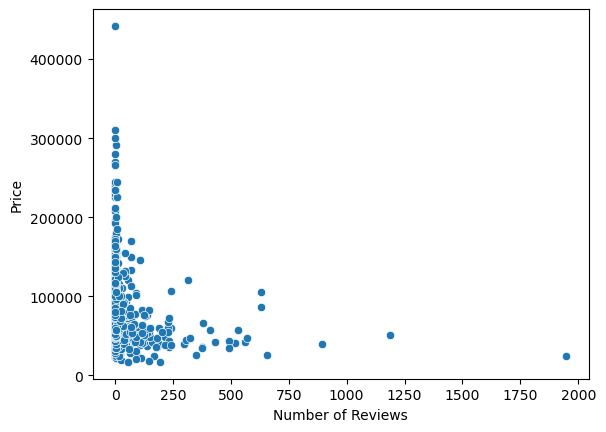

In [92]:
sns.scatterplot(data=df, x="Number of Reviews", y="Price")

<Axes: xlabel='Number of Ratings', ylabel='Number of Reviews'>

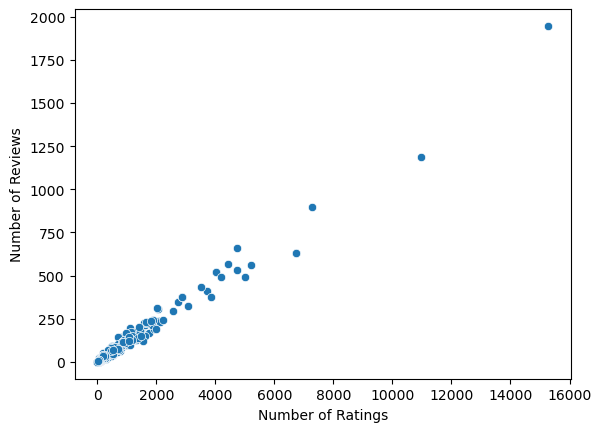

In [94]:
sns.scatterplot(data=df, x="Number of Ratings", y="Number of Reviews")

<Axes: xlabel='Number of Ratings', ylabel='Number of Reviews'>

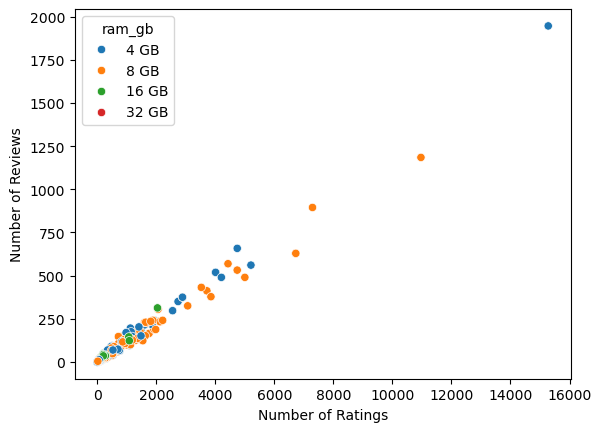

In [99]:
sns.scatterplot(data=df, x="Number of Ratings", y="Number of Reviews", hue = "ram_gb")

### Categorical vs continuous -> Boxplots

<Axes: xlabel='brand', ylabel='Price'>

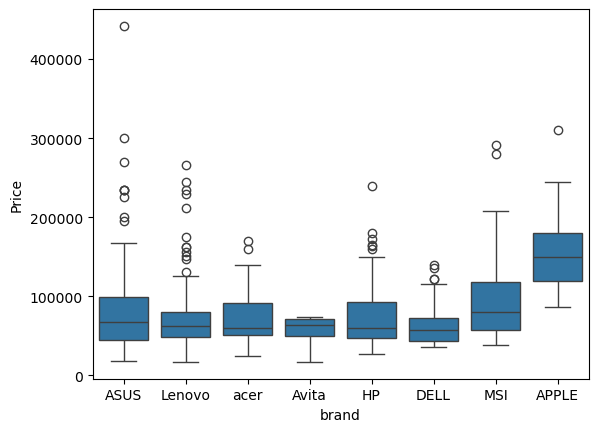

In [97]:
sns.boxplot(data=df, x="brand", y="Price")

<Axes: xlabel='brand', ylabel='Price'>

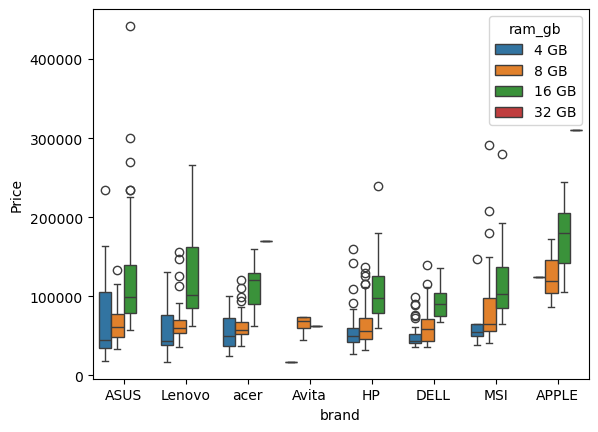

In [101]:
sns.boxplot(data=df, x="brand", y="Price", hue="ram_gb")

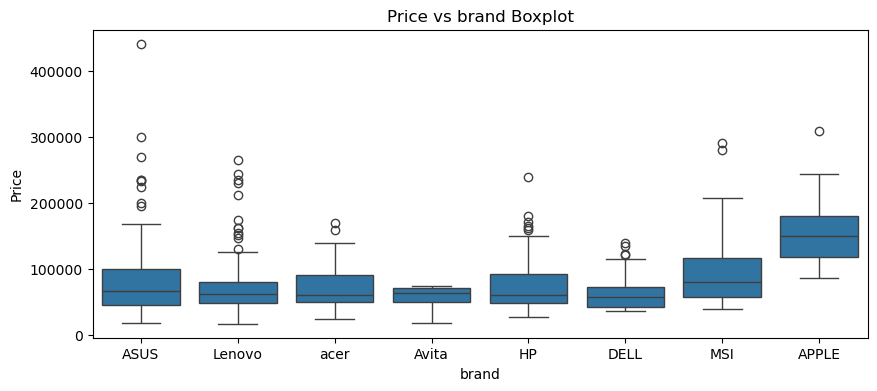

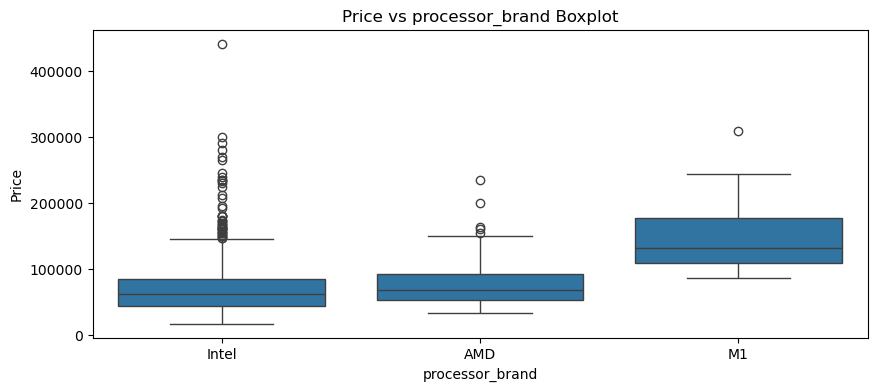

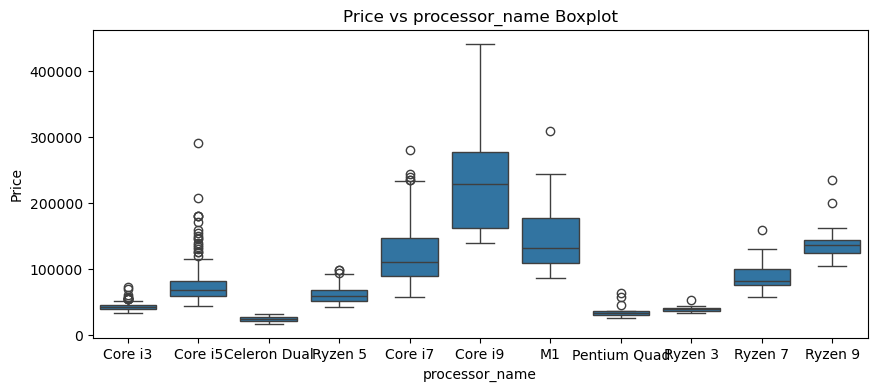

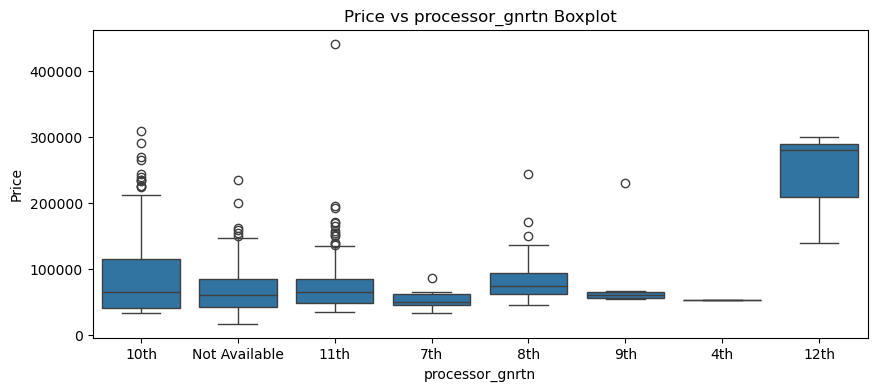

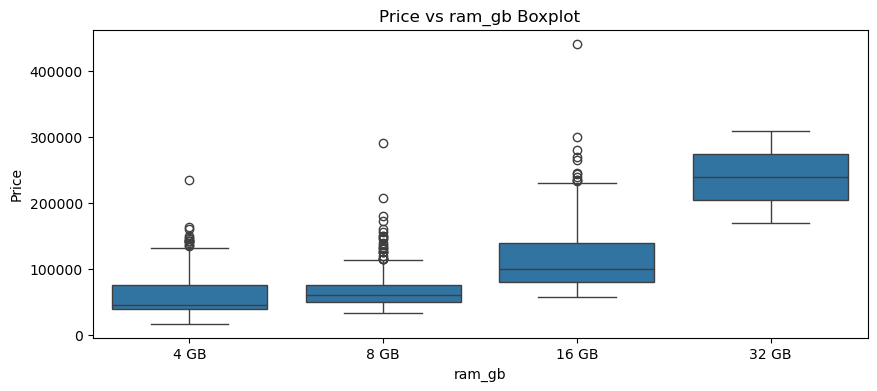

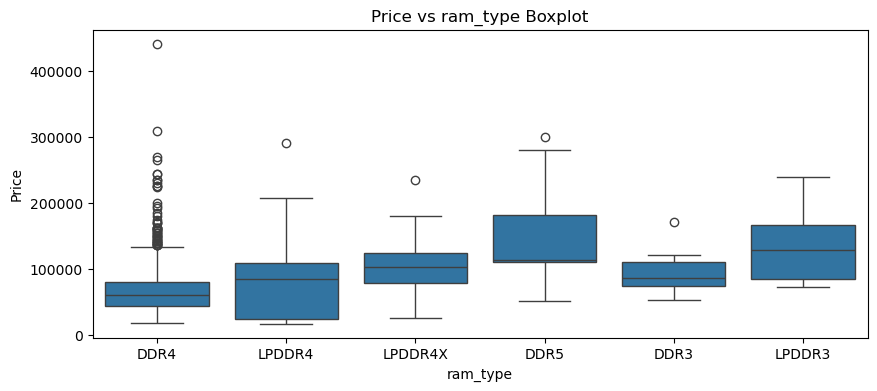

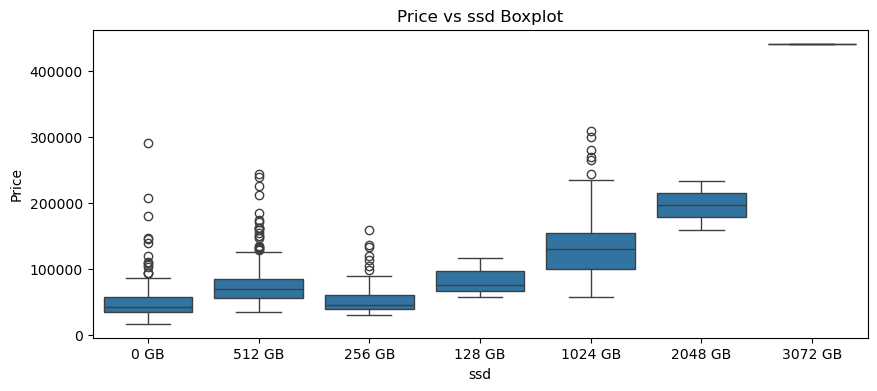

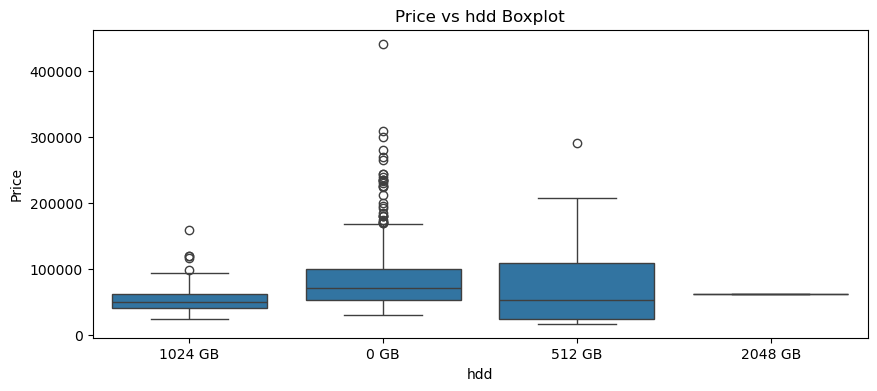

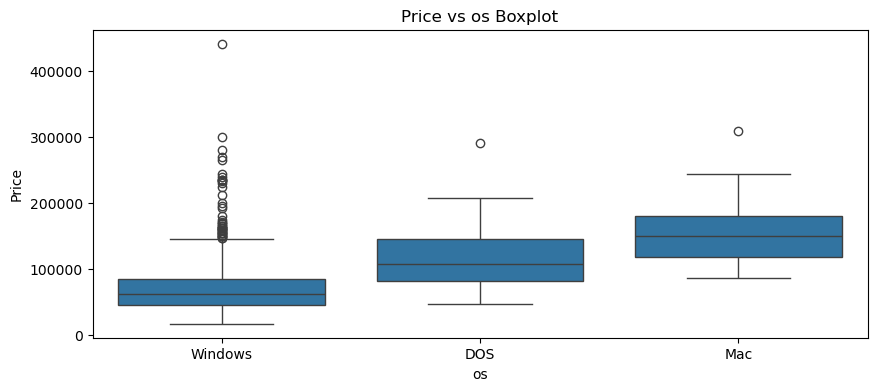

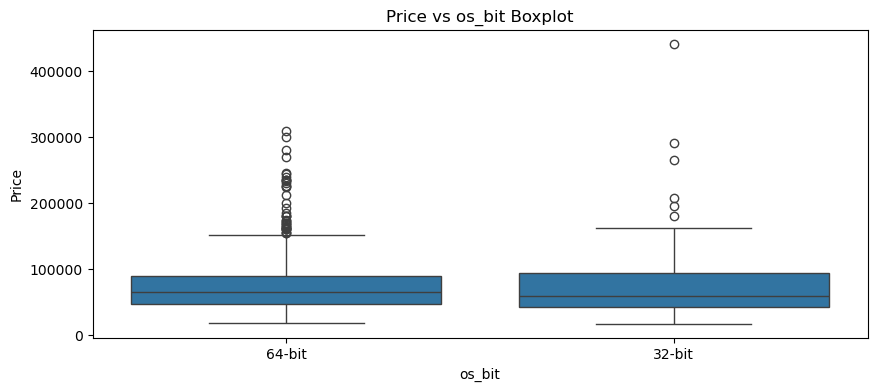

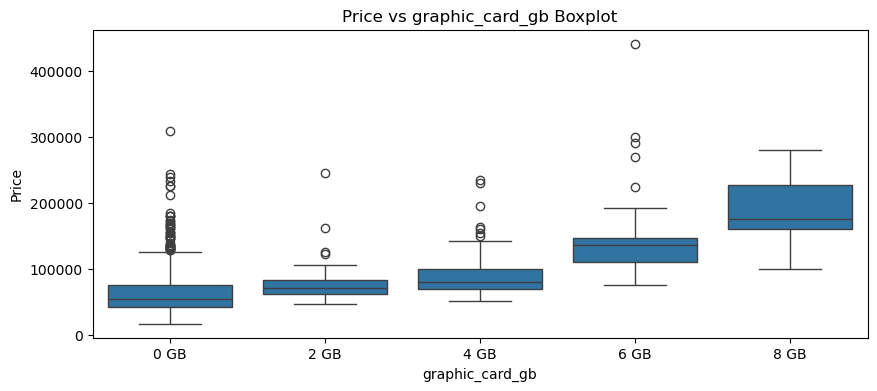

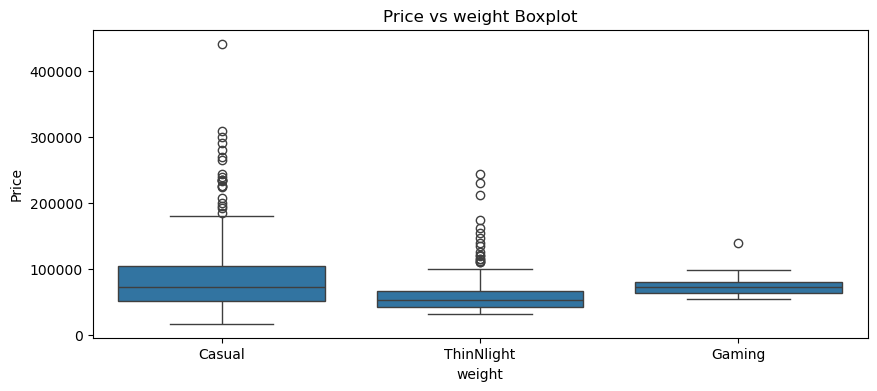

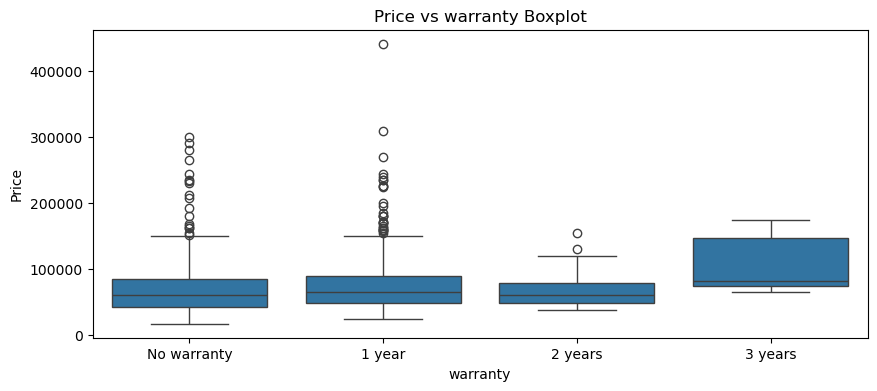

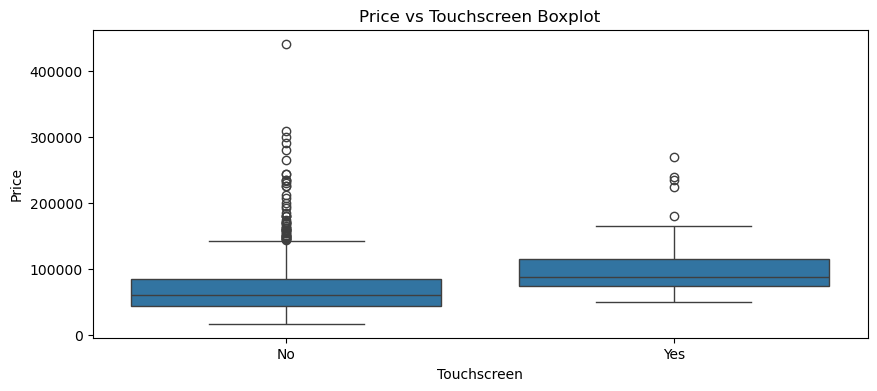

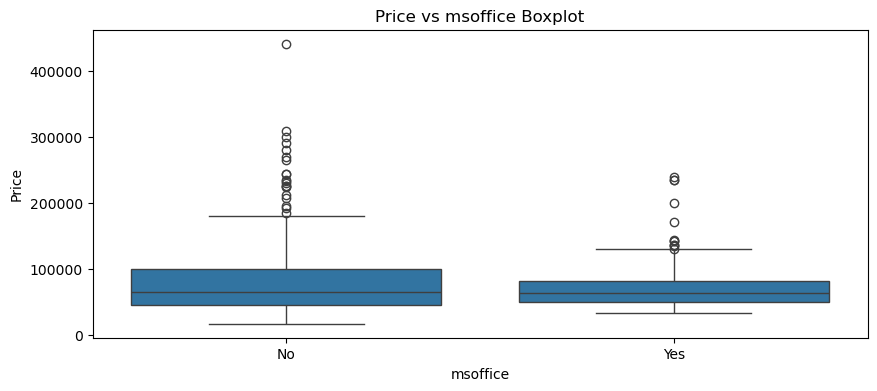

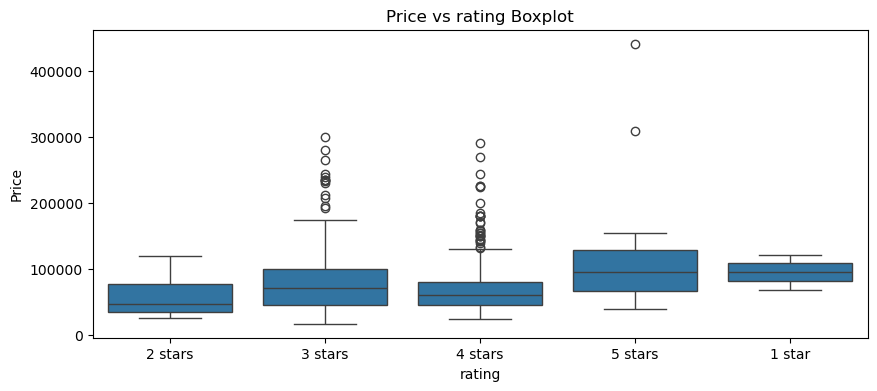

In [103]:
for i in cat:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=i, y="Price")
    plt.title(f"Price vs {i} Boxplot")
    plt.show()

### Cateogorical vs Categorical -> Crosstab heatmap

In [108]:
ctab1 = pd.crosstab(df["ram_type"], df["ram_gb"])
ctab1

ram_gb,16 GB,32 GB,4 GB,8 GB
ram_type,,,,
DDR3,2,0,0,5
DDR4,140,2,197,351
DDR5,2,0,4,2
LPDDR3,8,0,0,6
LPDDR4,1,0,10,16
LPDDR4X,20,0,12,24


<Axes: xlabel='ram_gb', ylabel='ram_type'>

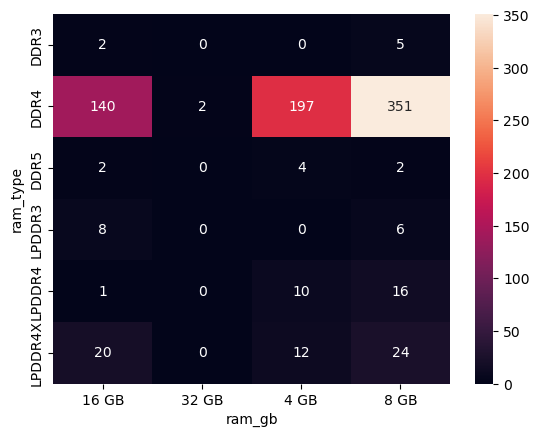

In [116]:
sns.heatmap(ctab1, annot=True, fmt="d")

In [118]:
ctab2 = pd.crosstab(df["warranty"], df["os"])
ctab2

os,DOS,Mac,Windows
warranty,,,
1 year,2,23,473
2 years,0,0,23
3 years,0,0,13
No warranty,14,0,254


<Axes: xlabel='os', ylabel='warranty'>

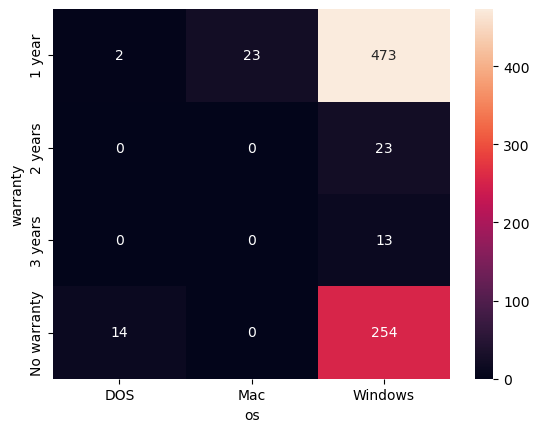

In [120]:
sns.heatmap(ctab2, annot=True, fmt="d")

In [122]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [124]:
ctab3 = pd.crosstab(df["brand"], df["rating"])
ctab3

rating,1 star,2 stars,3 stars,4 stars,5 stars
brand,,,,,
APPLE,0,0,0,22,1
ASUS,0,3,115,117,8
Avita,0,0,6,0,0
DELL,2,2,68,75,2
HP,0,1,44,88,3
Lenovo,0,3,67,72,2
MSI,0,0,16,34,0
acer,0,0,22,29,0


<Axes: xlabel='rating', ylabel='brand'>

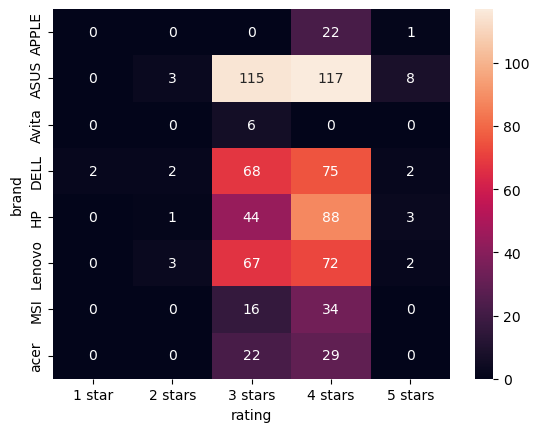

In [128]:
sns.heatmap(ctab3, annot=True, fmt="d")

## Multivariate

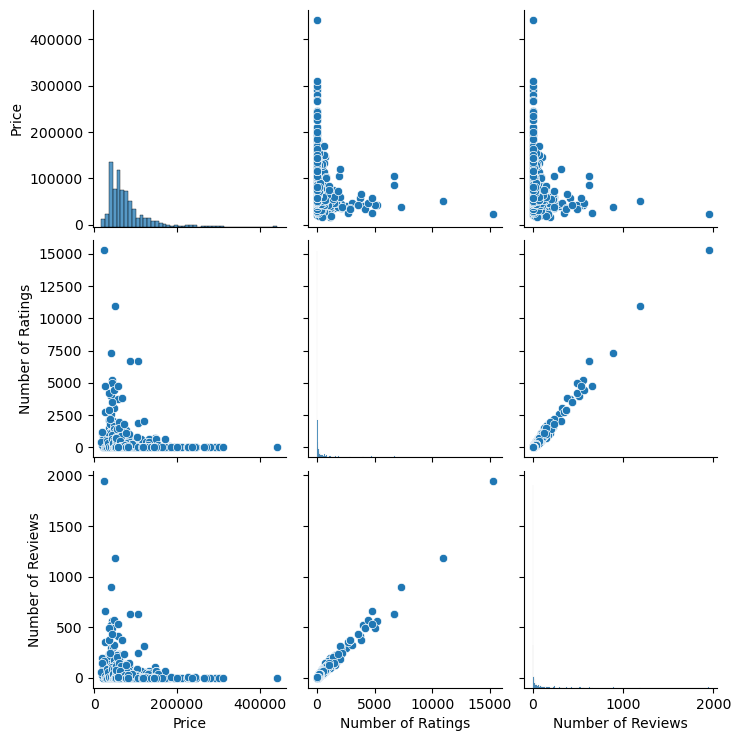

In [131]:
sns.pairplot(data=df)

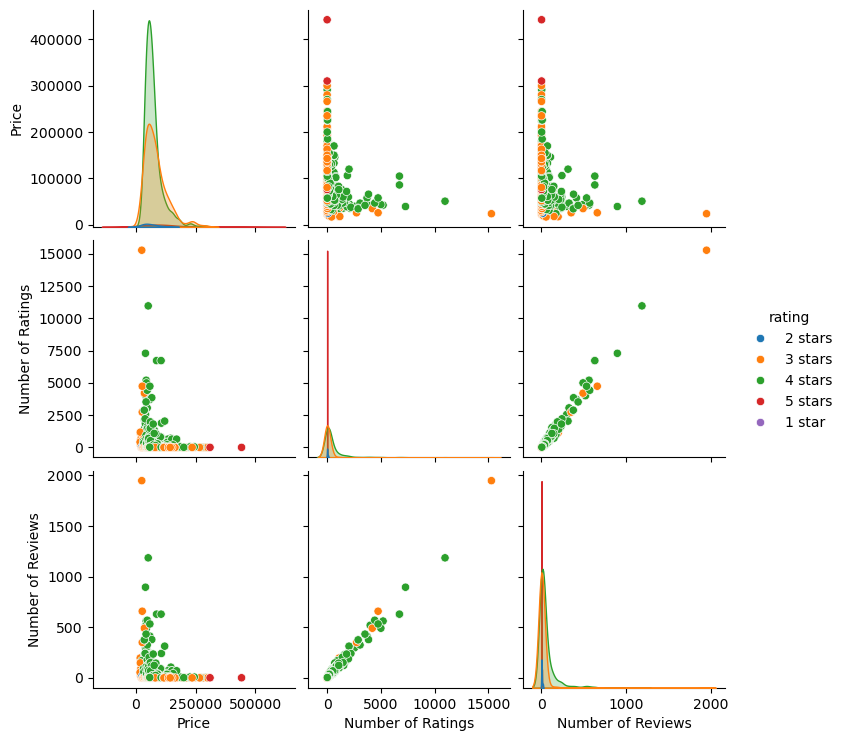

In [133]:
sns.pairplot(data=df, hue="rating")

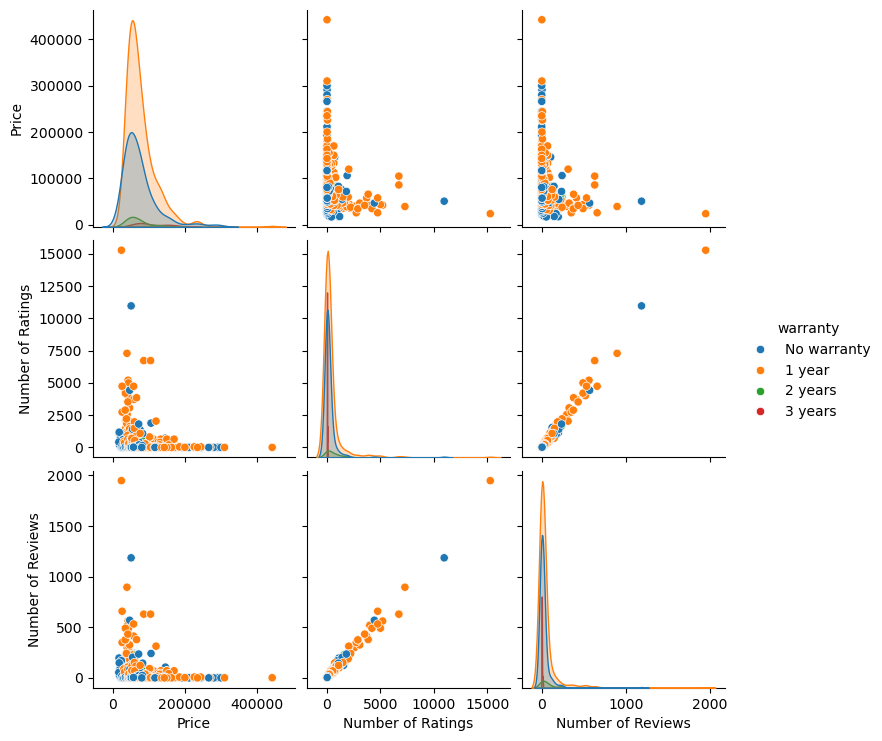

In [135]:
sns.pairplot(data=df, hue="warranty")

### Correlation Heatmap

In [140]:
corr = df.corr(numeric_only=True)
corr

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.152553,-0.156791
Number of Ratings,-0.152553,1.000000,0.991062
Number of Reviews,-0.156791,0.991062,1.000000


<Axes: >

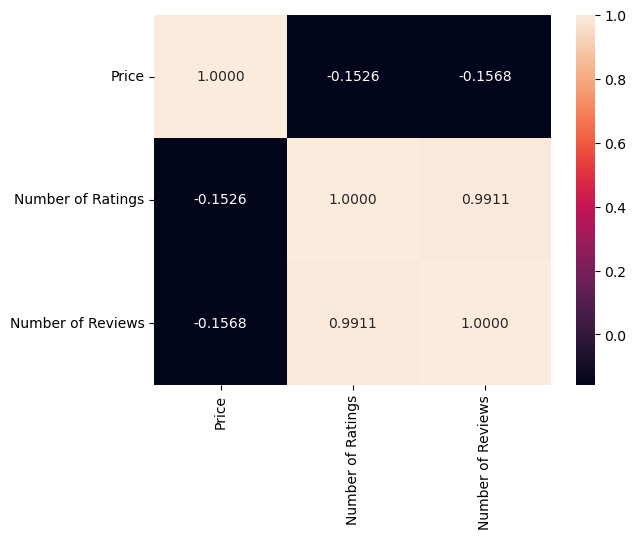

In [148]:
sns.heatmap(corr, annot=True, fmt=".4f")

## Extra analysis

### Find average price by brand 

In [156]:
a = (
    df.groupby(by = "brand")
    .agg({"Price" : "mean"})
    .sort_values(by = "Price", ascending=False)
    .round(2)
)

In [158]:
a

,Price
brand,
APPLE,157081.30
MSI,98713.02
ASUS,79426.02
HP,73640.27
Lenovo,72920.21
acer,72420.04
DELL,60788.95
Avita,56346.50


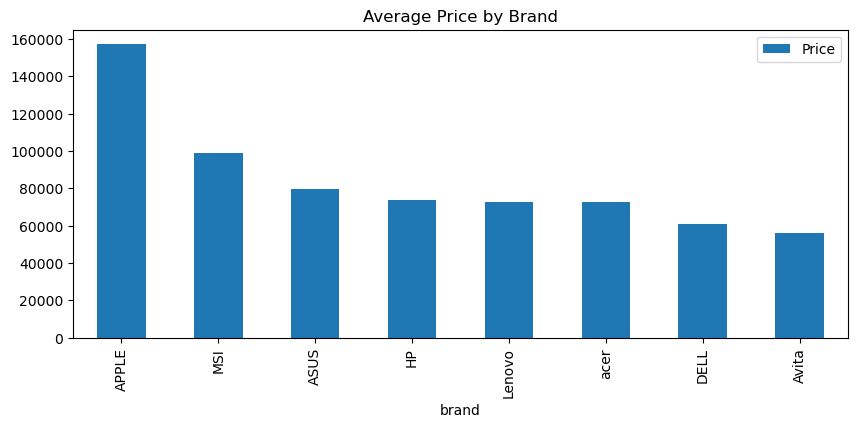

In [162]:
a.plot(kind="bar", figsize=(10, 4), title="Average Price by Brand")
plt.show()

### What is median price by Ram Gb and warranty

In [170]:
b = (
    df.groupby(by = ["ram_gb", "warranty"])
    .agg({"Price": "median"})
)

In [172]:
b

Price
ram_gb warranty             
16 GB  1 year        99990.0
       2 years       94990.0
       3 years      159990.0
       No warranty  110494.5
32 GB  1 year       239990.0
4 GB   1 year        49990.0
       2 years       39469.5
       3 years       80239.0
       No warranty   40890.0
8 GB   1 year        59990.0
       2 years       52990.0
       3 years       98692.0
       No warranty   59990.0

<Axes: ylabel='ram_gb,warranty'>

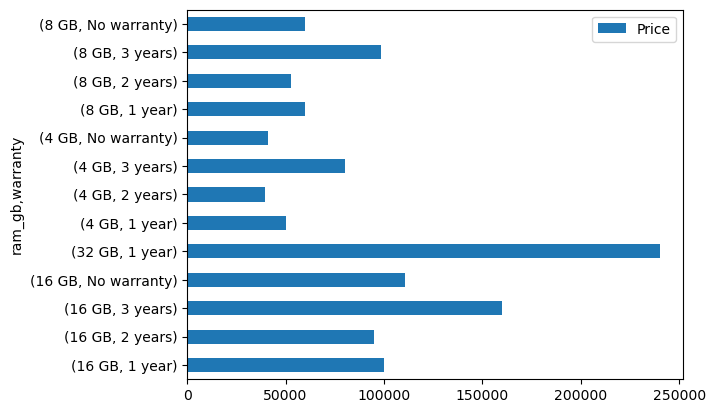

In [174]:
b.plot(kind="barh")